In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data
from scipy.stats import norm

%matplotlib inline

In [32]:
# # import data
# def get_data(stocks, start, end):
#     stockData = data.DataReader(stocks,'yahoo', start, end)
#     stockData = stockData['Close']
#     returns = stockData.pct_change()
#     meanReturns = returns.mean()
#     covMatrix = create_covar(stockData)
#     return meanReturns, covMatrix

# stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
# stocks = [stock + '.AX' for stock in stockList]
# endDate = dt.datetime.now()
# startDate = endDate - dt.timedelta(days=300)

# meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

In [60]:
def get_data(stocks, start, end):
    stockData = data.DataReader(stocks,'yahoo', start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
# stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

weights = [0.3,0.1,0.1,0.2,0.2,0.1]

In [91]:
# def get_data(stocks, start_end, date_end):

tickers = ['AAPL', 'MSFT', 'AMZN', 'TSLA']

start_date = '2000-01-01'
end_date = '2020-01-01'

panel_data = data.DataReader(tickers,'yahoo',start_date,end_date)
panel_data = panel_data['Adj Close']
returns = panel_data.pct_change()
meanReturns = returns.mean()
covMatrix = returns.cov()

weights = [0.2,0.1,0.3,0.4]

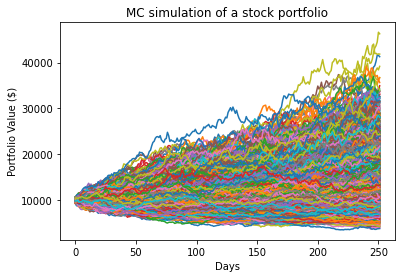

In [92]:
# Monte Carlo Method
mc_sims = 6000 # number of simulations
T = 252 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [93]:
df = pd.DataFrame(portfolio_sims)

In [94]:
df

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,9826.538398,10202.931825,9936.156651,9727.399941,10517.565816,10024.067220,9918.802586,10219.767410,10488.091151,9852.372374,...,10265.368415,9745.894124,9914.213329,9960.102791,9813.084009,9900.220118,10278.727028,9854.983066,10307.599371,9880.462958
1,9849.000473,9919.788298,9643.671559,9430.545807,10729.783483,9965.231034,9788.917881,9988.184383,10493.291525,9592.980905,...,10323.956431,9641.214089,9896.659856,9842.412305,9851.383384,9955.800069,10001.636603,10065.763238,10575.591396,9846.932917
2,9898.149710,9651.889252,9820.194932,9756.574246,10524.740225,10035.456894,9739.295663,9985.056170,10734.428611,9541.191434,...,10372.764872,9779.142855,10194.858861,9879.767452,9794.829355,9962.313052,10074.384669,9696.972776,10290.566835,10086.048761
3,9979.464836,9870.139185,10105.599092,9466.619597,10358.482138,10242.539614,9794.956677,10029.907994,11279.618402,9877.473204,...,10347.869016,10038.108771,10214.658572,9927.415213,9799.981037,10043.575416,9606.829760,9589.928447,10638.091390,9633.156769
4,9983.750166,10053.421946,10113.931152,9392.476113,10520.407015,10413.592525,9783.117639,9834.657505,10985.551952,9776.494472,...,10483.116155,10109.817980,10078.140455,10045.163695,9658.633533,10240.431023,9611.361212,9650.033090,10561.884362,9720.466459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,20923.153330,10516.214980,13074.230986,10574.403140,10183.835672,16226.837919,13094.429617,16259.427856,26739.622934,8556.114133,...,18116.753755,12445.635921,12962.436224,12971.827592,7973.268439,10700.226140,10474.789660,11988.468312,8565.036420,8272.132234
248,21168.879258,10887.043540,13305.897820,10211.457739,10164.131369,16023.073438,13441.587915,16358.682321,26128.632652,8670.163918,...,18449.112617,12786.995477,13263.272492,13417.270960,7681.872950,10441.156567,10127.608414,11737.907080,8720.866365,8466.528324
249,20742.758201,11116.246609,13471.238511,9848.819311,10376.167963,15409.401366,12883.156211,16397.168893,25594.162780,8953.279804,...,18170.553825,13490.665645,13229.726197,13268.023473,7582.200586,10553.730494,10434.545611,11842.458214,8458.105232,8504.445684
250,20867.859854,10853.618081,13696.716941,9753.375122,10421.645177,15119.635143,12818.114127,16620.401653,25918.125736,8976.723930,...,18454.023701,13442.046240,13270.135472,13255.931672,7386.780665,10466.736838,10472.463677,11888.897167,8501.018969,8636.589491


In [95]:
percentagelist = []

for i in range(0,6000):
    initial = df[i].iloc[0]
    end = df[i].iloc[251]
    change = ((end-initial)/initial)*100
    percentagelist.append(change)

In [96]:
percentagelist

[109.49027928732443,
 3.5240054018633087,
 39.169737944623925,
 1.5909999088688453,
 -2.911982879627403,
 51.62796904402435,
 26.95385843951667,
 60.126012733644366,
 147.8327473043693,
 -12.288075467589048,
 36.28137540013686,
 67.10241341201176,
 17.52769008874364,
 104.48174962691772,
 -6.835817935803035,
 -3.056490576055316,
 -23.585585261232485,
 87.11313918552793,
 61.03195173310469,
 -4.696663878420789,
 63.70124832818863,
 30.638203946755127,
 24.001961437213385,
 71.65825124476993,
 -9.8276807041089,
 12.567900461810064,
 -39.00749754792611,
 160.2929055371193,
 27.623143818413464,
 22.270081380300248,
 -4.263719342747526,
 60.52347501308053,
 4.065950811045516,
 107.68283394301321,
 108.34841749315845,
 -8.211679966887269,
 -3.621021479864333,
 39.470345061130566,
 52.697207247007704,
 13.81282948131401,
 2.057621977004806,
 97.55600103209945,
 36.76623389155168,
 23.76322643530839,
 41.323781960723046,
 40.22047521399292,
 206.48028745586427,
 -22.592061873042883,
 75.180810

In [97]:
max(percentagelist)

345.82455779402414

In [98]:
min(percentagelist)

-60.983607530328854

In [99]:
total = 0
for n in percentagelist:
    total += n
    
avg = total/10000

avg

24.097904287245193

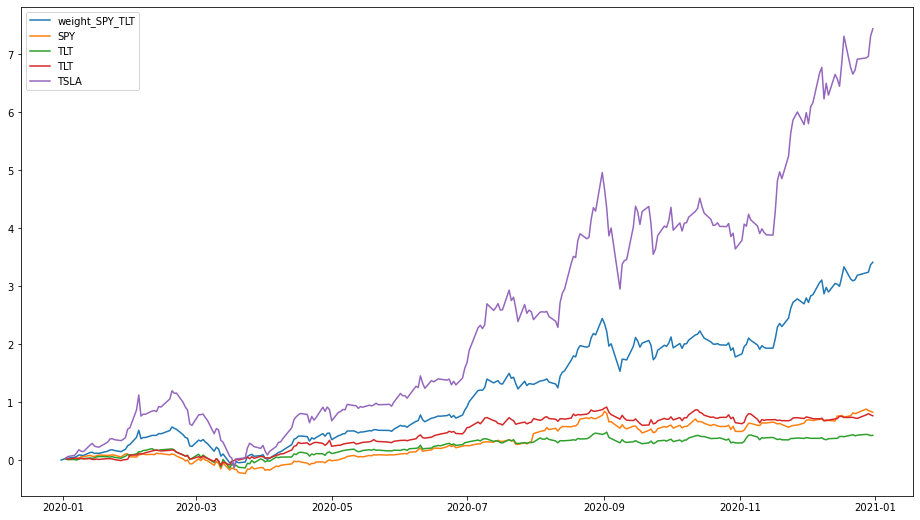

In [72]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'TSLA']

start_date = '2020-01-01'
end_date = '2021-01-01'

panel_data = data.DataReader(tickers,'yahoo',start_date,end_date)

weights = [0.2,0.1,0.3,0.4]

return_series_adj = (panel_data['Adj Close'].pct_change()+ 1).cumprod() - 1

weighted_return_series_test = weights * (return_series_adj)
#Sum the weighted returns for SPY and TLT
return_series_test = weighted_return_series_test.sum(axis=1) #add up the returns from the 2 ETFs

#Plot the weighted returns and individual returns on the same plot for comparison
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(return_series_test, label = 'weight_SPY_TLT')

# return_series_adj_spy_tlt.plot(figsize=(16,9))
ax.plot(return_series_adj['AAPL'] , label = 'SPY')
ax.plot(return_series_adj['MSFT'] , label = 'TLT')
ax.plot(return_series_adj['AMZN'] , label = 'TLT')
ax.plot(return_series_adj['TSLA'] , label = 'TSLA')
ax.legend()

In [73]:
test_returns = return_series_test.tail(1)
print("Portfolio Return:", test_returns[-1].round(3))

Portfolio Return: 3.41


In [90]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
251,10894.945711,11957.509317,9015.429129,10324.679704,8234.067751,9832.806761,11020.819528,10338.56439,10132.726292,11109.655954,...,8754.614232,8424.438988,10266.828931,7999.191054,11647.881114,12916.733125,10393.14771,8107.522928,9742.285252,11741.77673


In [91]:
df.iloc[251].mean()

10164.771499385963